<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Su-Schrieffer-Heeger (SSH) Model I__

## _(1D Topological Insulator)_


The **Su-Schrieffer-Heeger (SSH) model** describes spinless fermions hopping on a one-dimensional lattice with staggered hopping amplitudes. Using the SSH model, we introduce the concepts of:

- The *single-particle Hamiltonian*
- The difference between *bulk* and *boundary*
- *Chiral symmetry*
- *Topological invariants*
- *Bulk–boundary correspondence*


![SSH](SSH.png) 

### Hamiltonion
The tight-binding Hamiltonian of the Su-Schrieffer-Heeger (SSH) model is given by:

$$
\boxed{H = t_1 \sum_{n=1}^{N} \left( |n_B\rangle \langle n_A| + \text{h.c.} \right) + t_2 \sum_{n=1}^{N-1} \left( |(n+1)_A\rangle \langle n_B| + \text{h.c.} \right)}
$$

Here:

- $ t_1 $: intracell hopping amplitude (within the same unit cell) ($v$)
- $ t_2 $: intercell hopping amplitude (between adjacent unit cells) ($w$)
- $ |n_A\rangle $, $ |n_B\rangle $: localized states on sublattices $ A $ and $ B $ in the $ n $-th unit cell
- h.c.: Hermitian conjugate


with martix representation: (i.e. N = 4)
$$
H =
\begin{pmatrix}
0 & t_1 & 0 & 0 & 0 & 0 & 0 & 0 \\
t_1 & 0 & t_2 & 0 & 0 & 0 & 0 & 0 \\
0 & t_2 & 0 & t_1 & 0 & 0 & 0 & 0 \\
0 & 0 & t_1 & 0 & t_2 & 0 & 0 & 0 \\
0 & 0 & 0 & t_2 & 0 & t_1 & 0 & 0 \\
0 & 0 & 0 & 0 & t_1 & 0 & t_2 & 0 \\
0 & 0 & 0 & 0 & 0 & t_2 & 0 & t_1 \\
0 & 0 & 0 & 0 & 0 & 0 & t_1 & 0
\end{pmatrix}
$$


In Pauli Basis:

With $ n = 1, $\dots$, N $, and $ \alpha \in \{ A, B \} $, we define the Hamiltonian in the basis of sublattices using Pauli matrices:

$$
\sigma_0 =
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}, \quad
\sigma_x =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}, \quad
\sigma_y =
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}, \quad
\sigma_z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

Then, the Hamiltonian can be written as:

$$ \boxed{
H = t_1 \sum_{n=1}^{N} |n\rangle \langle n| \otimes \sigma_x
+ t_2 \sum_{n=1}^{N-1} \left( \frac{1}{2} |n+1\rangle \langle n| \otimes (\sigma_x + i\sigma_y) + \text{h.c.} \right)}
$$

### Bulk Hamiltonian
As with every solid-state system, the SSH chain has a **bulk** and **boundaries**:
  - The **bulk** is the long central part of the chain.
  - The **boundaries** are the two ends or "edges" of the chain.

The physics in the bulk should not depend on how the edges are defined.

For simplicity, we impose **periodic boundary conditions**, effectively closing the chain into a ring.

Under these conditions, the **bulk Hamiltonian** becomes:
  $$
  H_{\text{bulk}} =
  \sum_{n=1}^{N} \left( t_1 |n_B\rangle \langle n_A| + t_2 |(n \bmod N) + 1_A\rangle \langle n_B| \right) + \text{h.c.}
  $$

We seek eigenstates of this Hamiltonian:
  $$
  H_{\text{bulk}} |\psi_n(k)\rangle = E_n(k) |\psi_n(k)\rangle
  $$

Where $n \in \{1, \dots, 2N\}$.


### Bulk Momentum-Space Hamiltonian

To analyze the bulk more conveniently, we perform a **Fourier transformation** to momentum space.

The Fourier-transformed basis is defined as:
  $$
  |k_A\rangle = \frac{1}{\sqrt{N}} \sum_{n=1}^{N} e^{-ikn} |n_A\rangle, \quad
  |k_B\rangle = \frac{1}{\sqrt{N}} \sum_{n=1}^{N} e^{-ikn} |n_B\rangle
  $$

Using this basis, the bulk Hamiltonian becomes block-diagonal in $k$:
  $$
  H_{\text{bulk}} = \sum_{k} |k\rangle \langle k| \otimes H(k)
  $$

Where $H(k)$ is the **Bloch Hamiltonian** acting in the sublattice (A/B) space:
$$
H(k) = \begin{pmatrix}
0 & t_1 + t_2 e^{-ik} \\
t_1 + t_2 e^{ik} & 0
\end{pmatrix}
$$
  
This can be written compactly using **Pauli matrices**:
$$ \boxed{
H(k) = \vec{d}(k) \cdot \vec{\sigma} = d_x(k) \, \sigma_x + d_y(k) \,\sigma_y
}
$$

Where:
  $$
  d_x(k) = t_1 + t_2 \cos(k), \quad
  d_y(k) = t_2 \sin(k)
  $$

The energy spectrum is given by:
$$ \boxed{
E(k) = \pm \sqrt{d_x(k)^2 + d_y(k)^2} = \pm \sqrt{t_1^2 + t_2^2 + 2t_1 t_2 \cos(k)}
}
$$

The corresponding eigenvectors:
$$
|\psi_\pm(k)\rangle = 
\begin{pmatrix}
\pm e^{-i\phi(k)} \\
1
\end{pmatrix}, \quad 
\phi(k) = \tan^{-1} \left( \frac{t_2 \sin(ka)}{t_1 + t_2 \cos(ka)} \right).
$$


In [1]:
# Main Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# Parameters
t1 = 1.0  # intracell hopping
t2 = 0.5  # intercell hopping

# k values in Brillouin zone
k = np.linspace(-np.pi, np.pi, 500)

# Energy bands for the dispersion relation
E_plus = np.sqrt(t1**2 + t2**2 + 2*t1*t2*np.cos(k))
E_minus = -E_plus

# d-vector components
d_x = t1 + t2 * np.cos(k)
d_y = t2 * np.sin(k)

# Phase phi(k)
phi_k = np.arctan2(d_y, d_x)

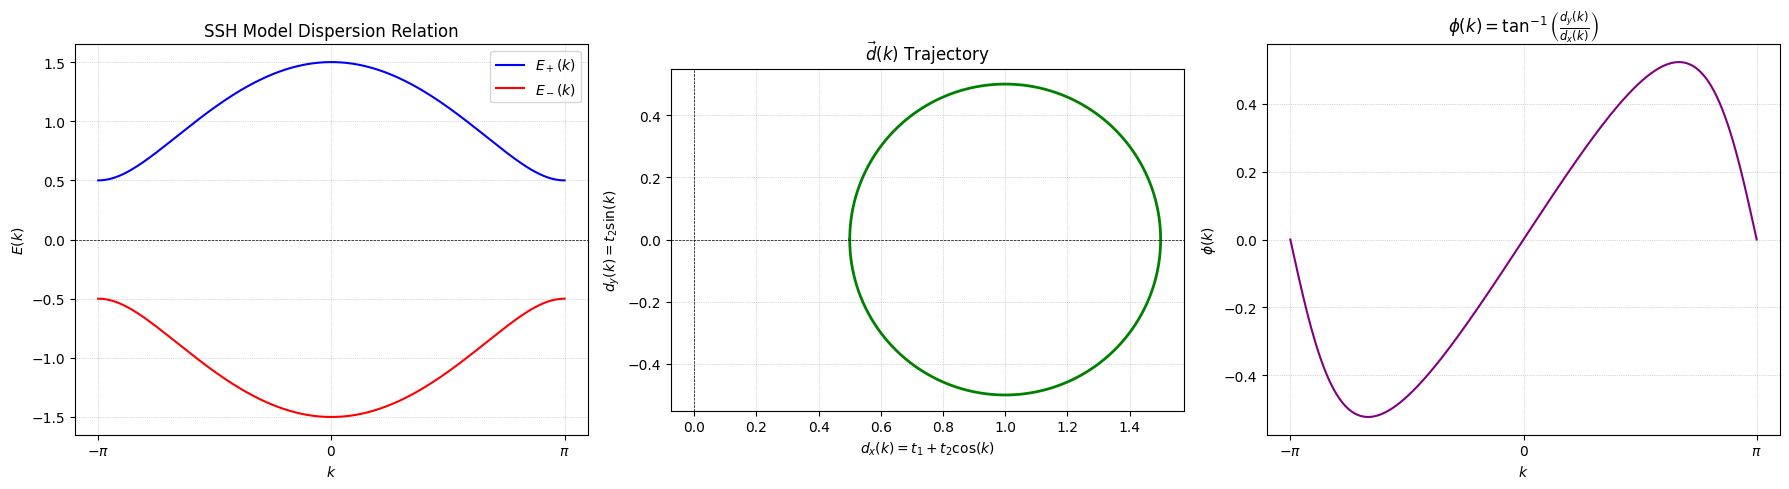

In [3]:
# Ploting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Dispersion Relation
ax1.plot(k, E_plus, label=r'$E_+(k)$', color='blue')
ax1.plot(k, E_minus, label=r'$E_-(k)$', color='red')
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax1.set_title('SSH Model Dispersion Relation')
ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'$E(k)$')
ax1.set_xticks([-np.pi, 0, np.pi])
ax1.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax1.grid(True, linestyle=':', linewidth=0.5)
ax1.legend()

# d-vector Trajectory
ax2.plot(d_x, d_y, color='green', lw=2)
ax2.set_title(r'$\vec{d}(k)$ Trajectory')
ax2.set_xlabel(r'$d_x(k) = t_1 + t_2 \cos(k)$')
ax2.set_ylabel(r'$d_y(k) = t_2 \sin(k)$')
ax2.grid(True, linestyle=':', linewidth=0.5)
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax2.axvline(0, color='black', linewidth=0.5, linestyle='--')
ax2.set_aspect('equal')  # ensure equal scaling on x and y axes

# Phase phi(k)
ax3.plot(k, phi_k, color='purple')
ax3.set_title(r'$\phi(k) = \tan^{-1}\left( \frac{d_y(k)}{d_x(k)} \right)$')
ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$\phi(k)$')
ax3.set_xticks([-np.pi, 0, np.pi])
ax3.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax3.grid(True, linestyle=':', linewidth=0.5)


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

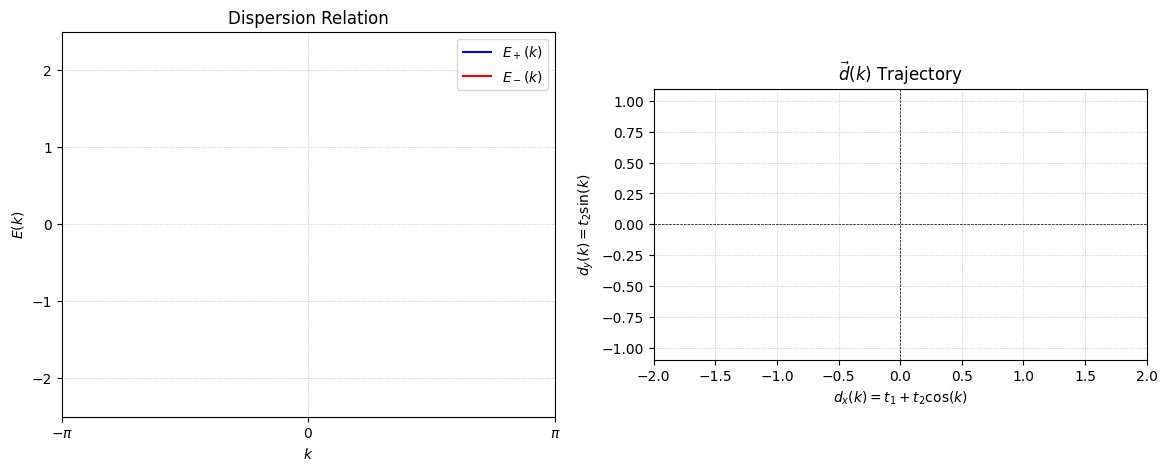

In [4]:
# Set up parameters
t2_values = np.arange(0.0, 1.01, 0.1)

# Set up figure and axes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Dispersion Relation Setup
line_plus, = ax1.plot([], [], label=r'$E_+(k)$', color='blue')
line_minus, = ax1.plot([], [], label=r'$E_-(k)$', color='red')
text_label = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, fontsize=12, verticalalignment='top')

ax1.set_xlim(-np.pi, np.pi)
ax1.set_ylim(-2.5, 2.5)
ax1.set_xticks([-np.pi, 0, np.pi])
ax1.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'$E(k)$')
ax1.set_title('Dispersion Relation')
ax1.grid(True, linestyle=':', linewidth=0.5)
ax1.legend()

# d-vector Trajectory Setup
line_d, = ax2.plot([], [], color='green')
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax2.axvline(0, color='black', linewidth=0.5, linestyle='--')
ax2.set_xlim(-2, 2)
ax2.set_ylim(-1.1, 1.1)
ax2.set_aspect('equal')
ax2.set_xlabel(r'$d_x(k) = t_1 + t_2 \cos(k)$')
ax2.set_ylabel(r'$d_y(k) = t_2 \sin(k)$')
ax2.set_title(r'$\vec{d}(k)$ Trajectory')
ax2.grid(True, linestyle=':', linewidth=0.5)

In [5]:
# Animation update function
def update(frame):
    t2 = t2_values[frame]
    E_plus = np.sqrt(t1**2 + t2**2 + 2*t1*t2*np.cos(k))
    E_minus = -E_plus
    d_x = t1 + t2 * np.cos(k)
    d_y = t2 * np.sin(k)

    # Update plots
    line_plus.set_data(k, E_plus)
    line_minus.set_data(k, E_minus)
    text_label.set_text(r'$t_1 = 1.0$, $t_2 = {:.1f}$'.format(t2))

    line_d.set_data(d_x, d_y)
    return line_plus, line_minus, line_d, text_label

In [6]:
# Create animation
ani = FuncAnimation(fig, update, frames=len(t2_values), interval=500, blit=True)

# Save animation as GIF
ani.save('SSH_Dispersion_intercell.gif', writer='pillow', fps=2)

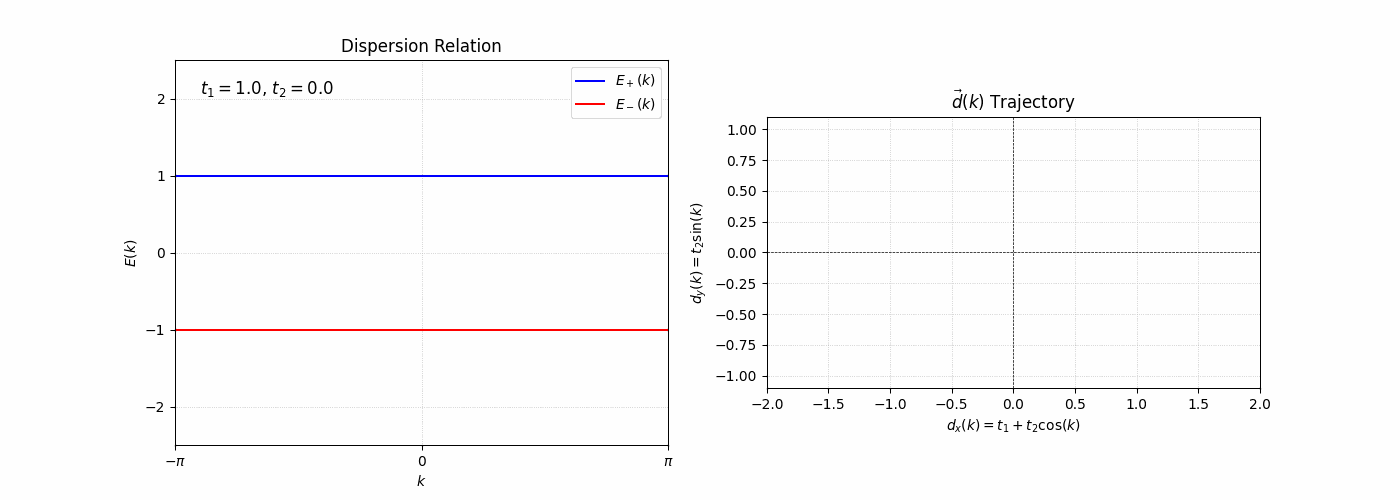

In [7]:
# For inline notebook animation
from IPython.display import HTML, Image
Image(filename='SSH_Dispersion_intercell.gif')

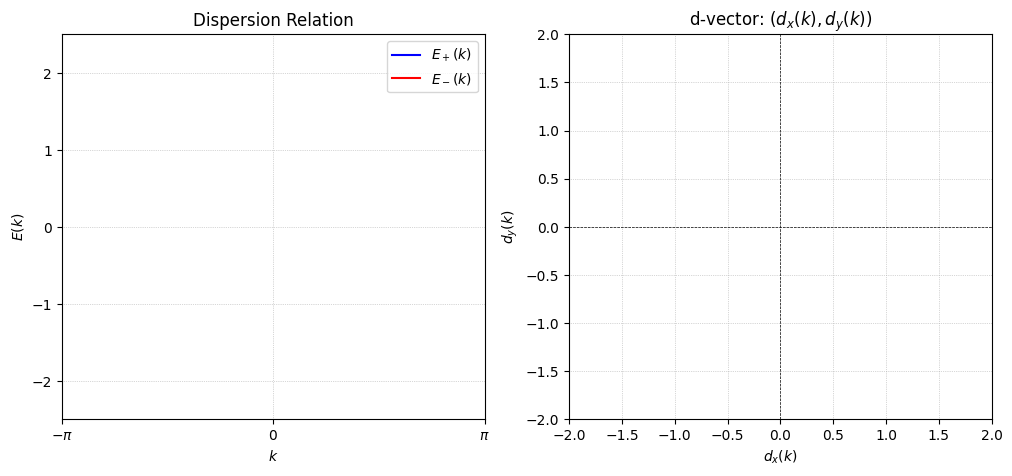

In [8]:
# Parameters
t1_values = np.arange(0.0, 1.01, 0.1)

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Dispersion plot
line_plus, = ax1.plot([], [], label=r'$E_+(k)$', color='blue')
line_minus, = ax1.plot([], [], label=r'$E_-(k)$', color='red')
text_label = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, fontsize=12, verticalalignment='top')
ax1.set_xlim(-np.pi, np.pi)
ax1.set_ylim(-2.5, 2.5)
ax1.set_xticks([-np.pi, 0, np.pi])
ax1.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'$E(k)$')
ax1.set_title('Dispersion Relation')
ax1.grid(True, linestyle=':', linewidth=0.5)
ax1.legend()

# d-vector plot
d_line, = ax2.plot([], [], color='green')
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax2.axvline(0, color='black', linewidth=0.5, linestyle='--')
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_xlabel(r'$d_x(k)$')
ax2.set_ylabel(r'$d_y(k)$')
ax2.set_title(r'd-vector: $(d_x(k), d_y(k))$')
ax2.grid(True, linestyle=':', linewidth=0.5)

In [9]:
# Animation update function
def update(frame):
    t1 = t1_values[frame]
    E_plus = np.sqrt(t1**2 + t2**2 + 2*t1*t2*np.cos(k))
    E_minus = -E_plus
    d_x = t1 + t2 * np.cos(k)
    d_y = t2 * np.sin(k)

    line_plus.set_data(k, E_plus)
    line_minus.set_data(k, E_minus)
    d_line.set_data(d_x, d_y)
    text_label.set_text(r'$t_1 = {:.1f}$, $t_2 = 0.5$'.format(t1))
    return line_plus, line_minus, text_label, d_line

In [10]:
# Create animation
ani = FuncAnimation(fig, update, frames=len(t1_values), interval=500, blit=True)

# Save animation as GIF
ani.save('SSH_Dispersion_intracell.gif', writer='pillow', fps=2)

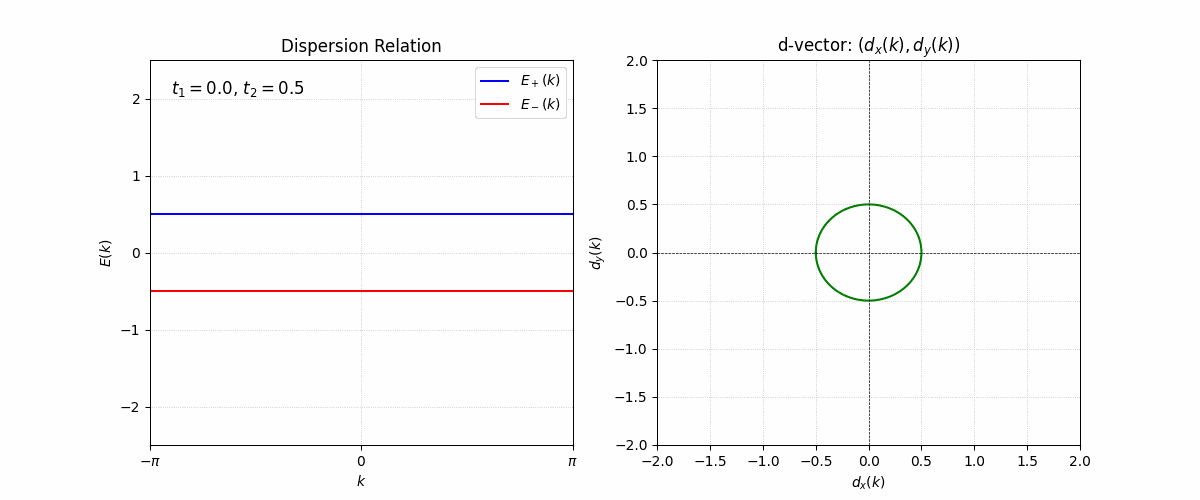

In [11]:
# Display GIF inline
Image(filename='SSH_Dispersion_intracell.gif')

## Fully Dimerized Limits

* Trivial Case:
$$
t_1 = t_2 = 0 \quad \Rightarrow \quad H = 0 \quad \Rightarrow \quad \text{All states have zero energy}
$$
![4](4.png) 

* Topological Dimerized Limit:
$$
t_1 = 0, \quad t_2 = 1
$$
$$
H(\lvert n_A \rangle + \lvert n_B \rangle) = 0
$$
$$
H(\lvert n_A \rangle - \lvert n_B \rangle) = \pm t_2 (\lvert n_A \rangle - \lvert n_B \rangle) = \pm (\lvert n_A \rangle - \lvert n_B \rangle)
$$
![2](2.png) 

* Trivial Dimerized Limit:
$$
t_1 = 1, \quad t_2 = 0
$$
$$
H(\lvert n_A \rangle + \lvert n_B \rangle) = 0
$$
$$
H(\lvert n_A \rangle - \lvert n_B \rangle) = \pm t_1 (\lvert n_A \rangle - \lvert n_B \rangle) = \pm (\lvert n_A \rangle - \lvert n_B \rangle)
$$
![1](1.png) 

* General Case:
$$
t_1 = t_2 = t, \quad H(k) =
\begin{pmatrix}
0 & t(1 + e^{-ik}) \\
t(1 + e^{ik}) & 0
\end{pmatrix}, \quad k \in [-\pi, \pi]
$$

This gives:
$$
E(k) = \pm 2t \cos\left(\frac{k}{2}\right)
$$

Let $ g_k = e^{ik/2} $, then:
$$
H(k) = t
\begin{pmatrix}
0 & g_k^* + g_k \\
g_k + g_k^* & 0
\end{pmatrix}
$$
![3](3.png) 


---

## Further Computational analysis
 _Topological Dimerized Limit :_

In [12]:
# Parameters
N = 20          # Number of unit cells
M = 2 * N       # Total number of sites (A and B in each cell)
# Topological Dimerized Limit: 
t1 = 0.5 
t2 = 1 

In [13]:
# Initialize Hamiltonian
H = np.zeros((M, M))

# Fill the Hamiltonian matrix
for i in range(0, M - 1, 2):
    H[i, i + 1] = t1       # t1: intracell hopping A-B
    H[i + 1, i] = t1

for i in range(1, M - 2, 2):
    H[i, i + 1] = t2       # t2: intercell hopping B-A
    H[i + 1, i] = t2

# Diagonalize
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Sort eigenvalues and reorder eigenvectors accordingly
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

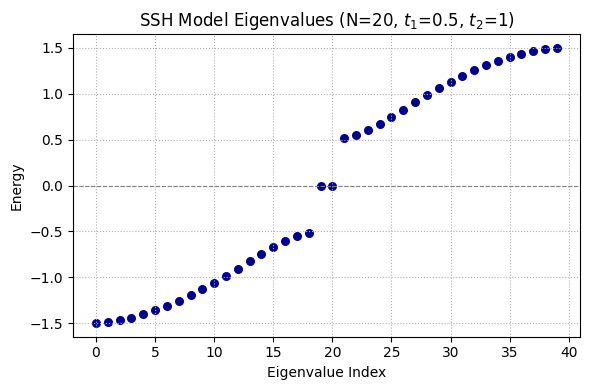

In [14]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(M), eigenvalues, color='darkblue', s=30)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Energy')
plt.title(f'SSH Model Eigenvalues (N={N}, $t_1$={t1}, $t_2$={t2})')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

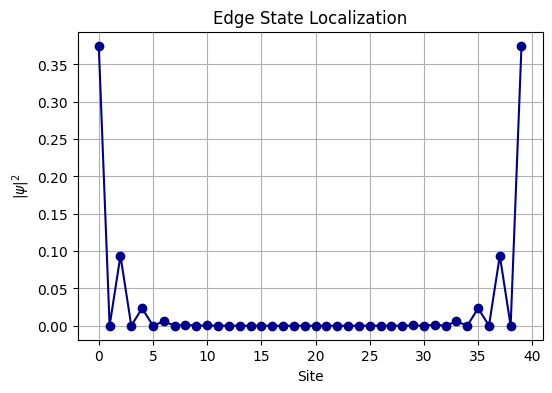

In [15]:
# Find index of eigenvalue closest to 0
idx_zero = np.argmin(np.abs(eigenvalues))
edge_state = eigenvectors[:, idx_zero]

# Plot amplitude
plt.figure(figsize=(6, 4))
plt.plot(np.abs(edge_state)**2, 'o-', color='darkblue')
plt.xlabel('Site')
plt.ylabel(r'$|\psi|^2$')
plt.title('Edge State Localization')
plt.grid(True)
plt.show()

Text(0, 0.5, '$|\\psi|^2$')

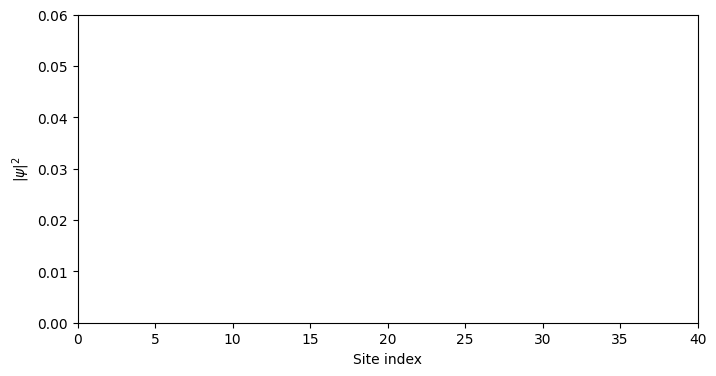

In [16]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], 'o-', color='darkblue')
title = ax.set_title("")
ax.set_xlim(0, M)
ax.set_ylim(0, 0.06)
ax.set_xlabel("Site index")
ax.set_ylabel(r'$|\psi|^2$')


In [17]:
# Initialization function
def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

# Animation function
def animate(i):
    psi = eigenvectors[:, i]
    # Compute probability density |ψ_n(i)|^2 for each site i
    prob_density = np.abs(psi)**2
    line.set_data(np.arange(M), prob_density)
    title.set_text(f"Eigenstate {i+1}, Energy = {eigenvalues[i]:.3f}")
    return line, title

In [18]:
# Create animation
ani = FuncAnimation(fig, animate, frames=M, init_func=init,
                    blit=True, interval=300, repeat=False)

# Save animation as GIF
ani.save('Eigenvectors.gif', writer='pillow', fps=2)

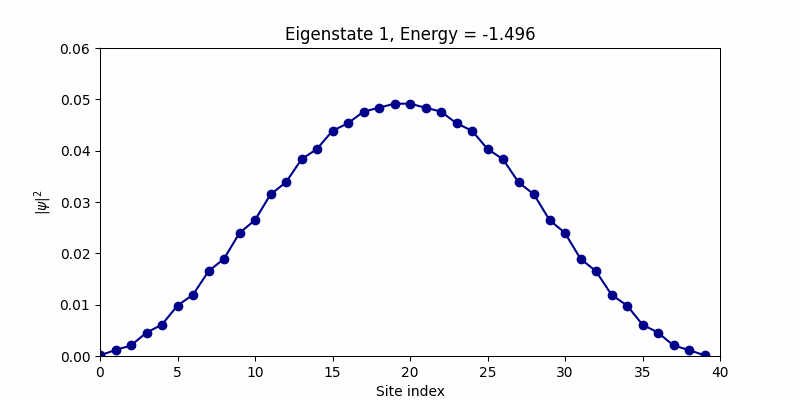

In [19]:
# Display GIF inline
Image(filename='Eigenvectors.gif')

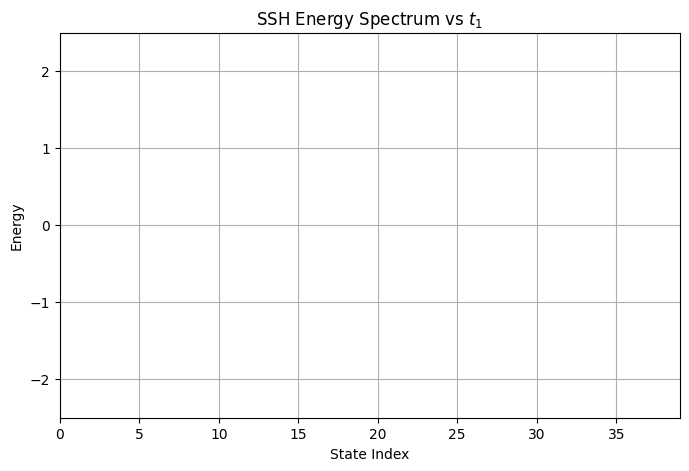

In [20]:
# Construct kets for animation

fig, ax = plt.subplots(figsize=(8, 5))
scatter = ax.scatter([], [], s=20, c='darkblue')
text_label = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

ax.set_xlim(0, M - 1)
ax.set_ylim(-2.5, 2.5)
ax.set_xlabel('State Index')
ax.set_ylabel('Energy')
ax.set_title('SSH Energy Spectrum vs $t_1$')
ax.grid(True)

In [21]:
# Update function for animation
def update(frame):
    t1 = t1_values[frame]
    H = np.zeros((M, M), dtype=complex)

    for i in range(N):
        H[2*i, 2*i+1] = -t1
        H[2*i+1, 2*i] = -t1

    for i in range(N - 1):
        H[2*i+1, 2*i+2] = -t2
        H[2*i+2, 2*i+1] = -t2

    eigvals = np.linalg.eigvalsh(H)
    scatter.set_offsets(np.column_stack([np.arange(M), eigvals]))
    text_label.set_text(r'$t_1 = {:.2f},\ t_2 = {:.1f}$'.format(t1, t2))
    return scatter, text_label

In [22]:
# Animate
ani = FuncAnimation(fig, update, frames=len(t1_values), interval=100, blit=True)

# Save animation as GIF
ani.save('Eigenvalues_intracell.gif', writer='pillow', fps=2)

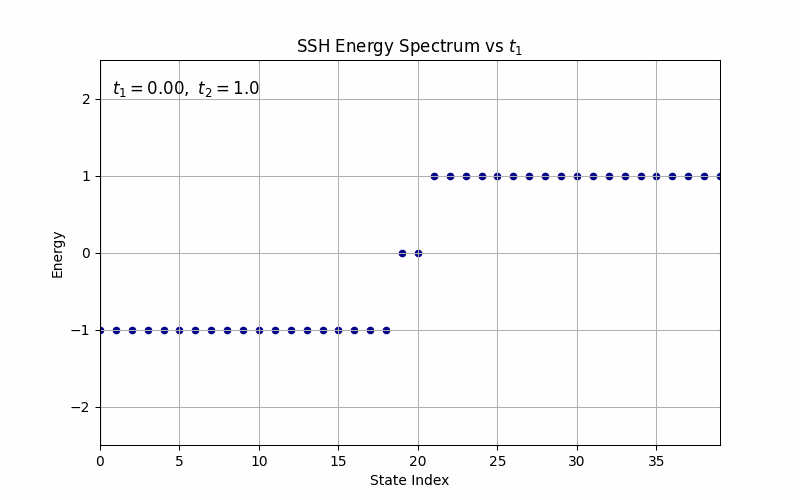

In [23]:
# Display GIF inline
Image(filename='Eigenvalues_intracell.gif')

In [24]:
# Storage for eigenvalues
eigs_vs_t1 = []
eigs_vs_t2 = []

# Compute E vs t1 (t2 fixed)
for t1 in t1_values:
    H = np.zeros((M, M), dtype=complex)
    for i in range(N):
        H[2*i, 2*i+1] = -t1
        H[2*i+1, 2*i] = -t1
    for i in range(N - 1):
        H[2*i+1, 2*i+2] = -t2
        H[2*i+2, 2*i+1] = -t2
    eigvals = np.linalg.eigvalsh(H)
    eigs_vs_t1.append(eigvals)

# Compute E vs t2 (t1 fixed)
for t2 in t2_values:
    H = np.zeros((M, M), dtype=complex)
    for i in range(N):
        H[2*i, 2*i+1] = -t1
        H[2*i+1, 2*i] = -t1
    for i in range(N - 1):
        H[2*i+1, 2*i+2] = -t2
        H[2*i+2, 2*i+1] = -t2
    eigvals = np.linalg.eigvalsh(H)
    eigs_vs_t2.append(eigvals)

# Convert to arrays for plotting
eigs_vs_t1 = np.array(eigs_vs_t1).T  
eigs_vs_t2 = np.array(eigs_vs_t2).T  

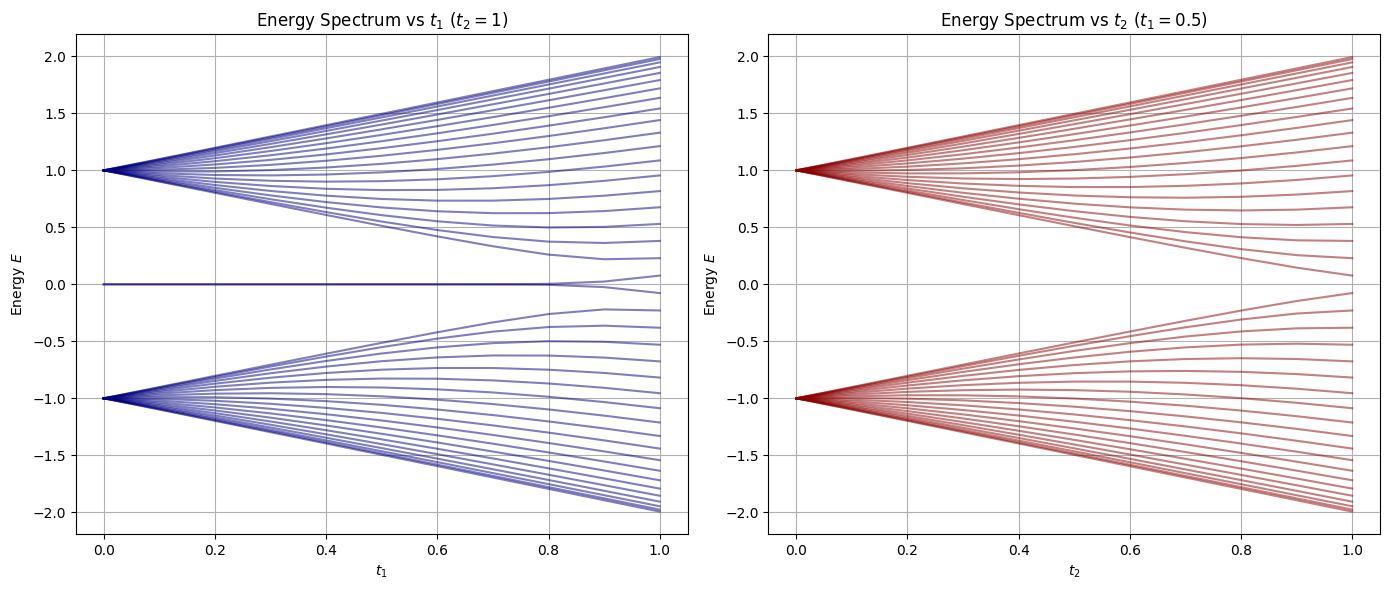

In [25]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot E vs t1
for eig in eigs_vs_t1:
    axs[0].plot(t1_values, eig, color='navy', alpha=0.5)
axs[0].set_title(r'Energy Spectrum vs $t_1$ ($t_2=1$)')
axs[0].set_xlabel(r'$t_1$')
axs[0].set_ylabel(r'Energy $E$')
axs[0].grid(True)

# Plot E vs t2
for eig in eigs_vs_t2:
    axs[1].plot(t2_values, eig, color='darkred', alpha=0.5)
axs[1].set_title(r'Energy Spectrum vs $t_2$ ($t_1=0.5$)')
axs[1].set_xlabel(r'$t_2$')
axs[1].set_ylabel(r'Energy $E$')
axs[1].grid(True)

plt.tight_layout()
plt.show()

---